In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import process
pd.set_option('display.max_columns', None)

C:\Users\tejes\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# After Loading the Data, the first step is to remove the irrelevant columns from the data set. Upon observation, in this dataset the first column which is unnamed and has values of train is irrelevant and hence is removed. Moreover there are a few ID columns like 'ID', 'CollegeID' and 'CollegeCityID' these are also dropped using the drop() method in pandas.

In [3]:
df1 = df.drop(columns=df.columns[0])
df1.drop(columns=['ID','CollegeID','CollegeCityID'],inplace=True)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#  Followed by dropping unused columns, I understood the data by looking into its shape to identify the number of columns and rows and also the info() method to look into the data types and null values.

In [4]:
df1.shape

(3998, 35)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

#  A few of the datatypes are inconsistent and must be transformed to relevant data types. I have performed that and fixed the issue and verified it with info() method.

In [6]:
df1['DOL'] = pd.to_datetime(df1['DOL'], errors='coerce')
df1['12graduation'] = pd.to_datetime(df1['12graduation'], format='%Y').dt.year.astype(str)
df1['CollegeTier'] = df1['CollegeTier'].astype('str')
df1['CollegeCityTier'] = df1['CollegeCityTier'].astype('str')
df1['GraduationYear'] = pd.to_datetime(df1['GraduationYear'], format='%Y', errors='coerce').dt.year.astype(str)
df1['GraduationYear'] = df1['GraduationYear'].replace('nan', np.nan)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    2123 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   object        
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   object        
 13  Deg

# Moreover I have also noticed that a few columns are having values as -1. This is an inconsistency with the data type, according to domain knowledge this means that there is no data in its place or the user refused to fill it. For numerical columns especially this -1 value could hinder with our analysis. Hence I replaced it with Null Values.

In [8]:
df1.loc[df1['Domain'] == -1, 'Domain'] = np.nan
df1.loc[df1['ComputerProgramming'] == -1, 'ComputerProgramming'] = np.nan
df1.loc[df1['ElectronicsAndSemicon'] == -1, 'ElectronicsAndSemicon'] = np.nan
df1.loc[df1['ComputerScience'] == -1, 'ComputerScience'] = np.nan
df1.loc[df1['MechanicalEngg'] == -1, 'MechanicalEngg'] = np.nan
df1.loc[df1['ElectricalEngg'] == -1, 'ElectricalEngg'] = np.nan
df1.loc[df1['TelecomEngg'] == -1, 'TelecomEngg'] = np.nan
df1.loc[df1['CivilEngg'] == -1, 'CivilEngg'] = np.nan
df1.loc[df1['JobCity'] == -1, 'JobCity'] = np.nan

In [9]:
df1.describe()

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3752.000000,3130.000000,1144.000000,902.000000,235.000000,161.000000,374.000000,42.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,74.466366,71.486171,501.649075,501.598799,513.378189,0.609525,451.301278,335.644231,405.636364,406.876596,433.037267,350.173797,349.666667,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,10.999933,8.167338,104.940021,86.783297,122.302332,0.273159,97.158687,81.194840,89.960805,84.894993,98.515537,75.661864,79.784670,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,40.000000,6.450000,180.000000,195.000000,120.000000,0.002750,105.000000,133.000000,130.000000,180.000000,206.000000,153.000000,166.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,66.000000,66.407500,425.000000,445.000000,430.000000,0.376060,385.000000,292.000000,346.000000,362.000000,366.000000,287.500000,292.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,74.400000,71.720000,500.000000,505.000000,515.000000,0.649390,455.000000,333.000000,407.000000,407.000000,433.000000,356.000000,348.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,82.600000,76.327500,570.000000,565.000000,595.000000,0.842248,515.000000,388.000000,469.000000,446.000000,500.000000,393.000000,388.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,98.700000,99.930000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


#  Next, I have divided the columns into numerical columns and plotted box plots of them.

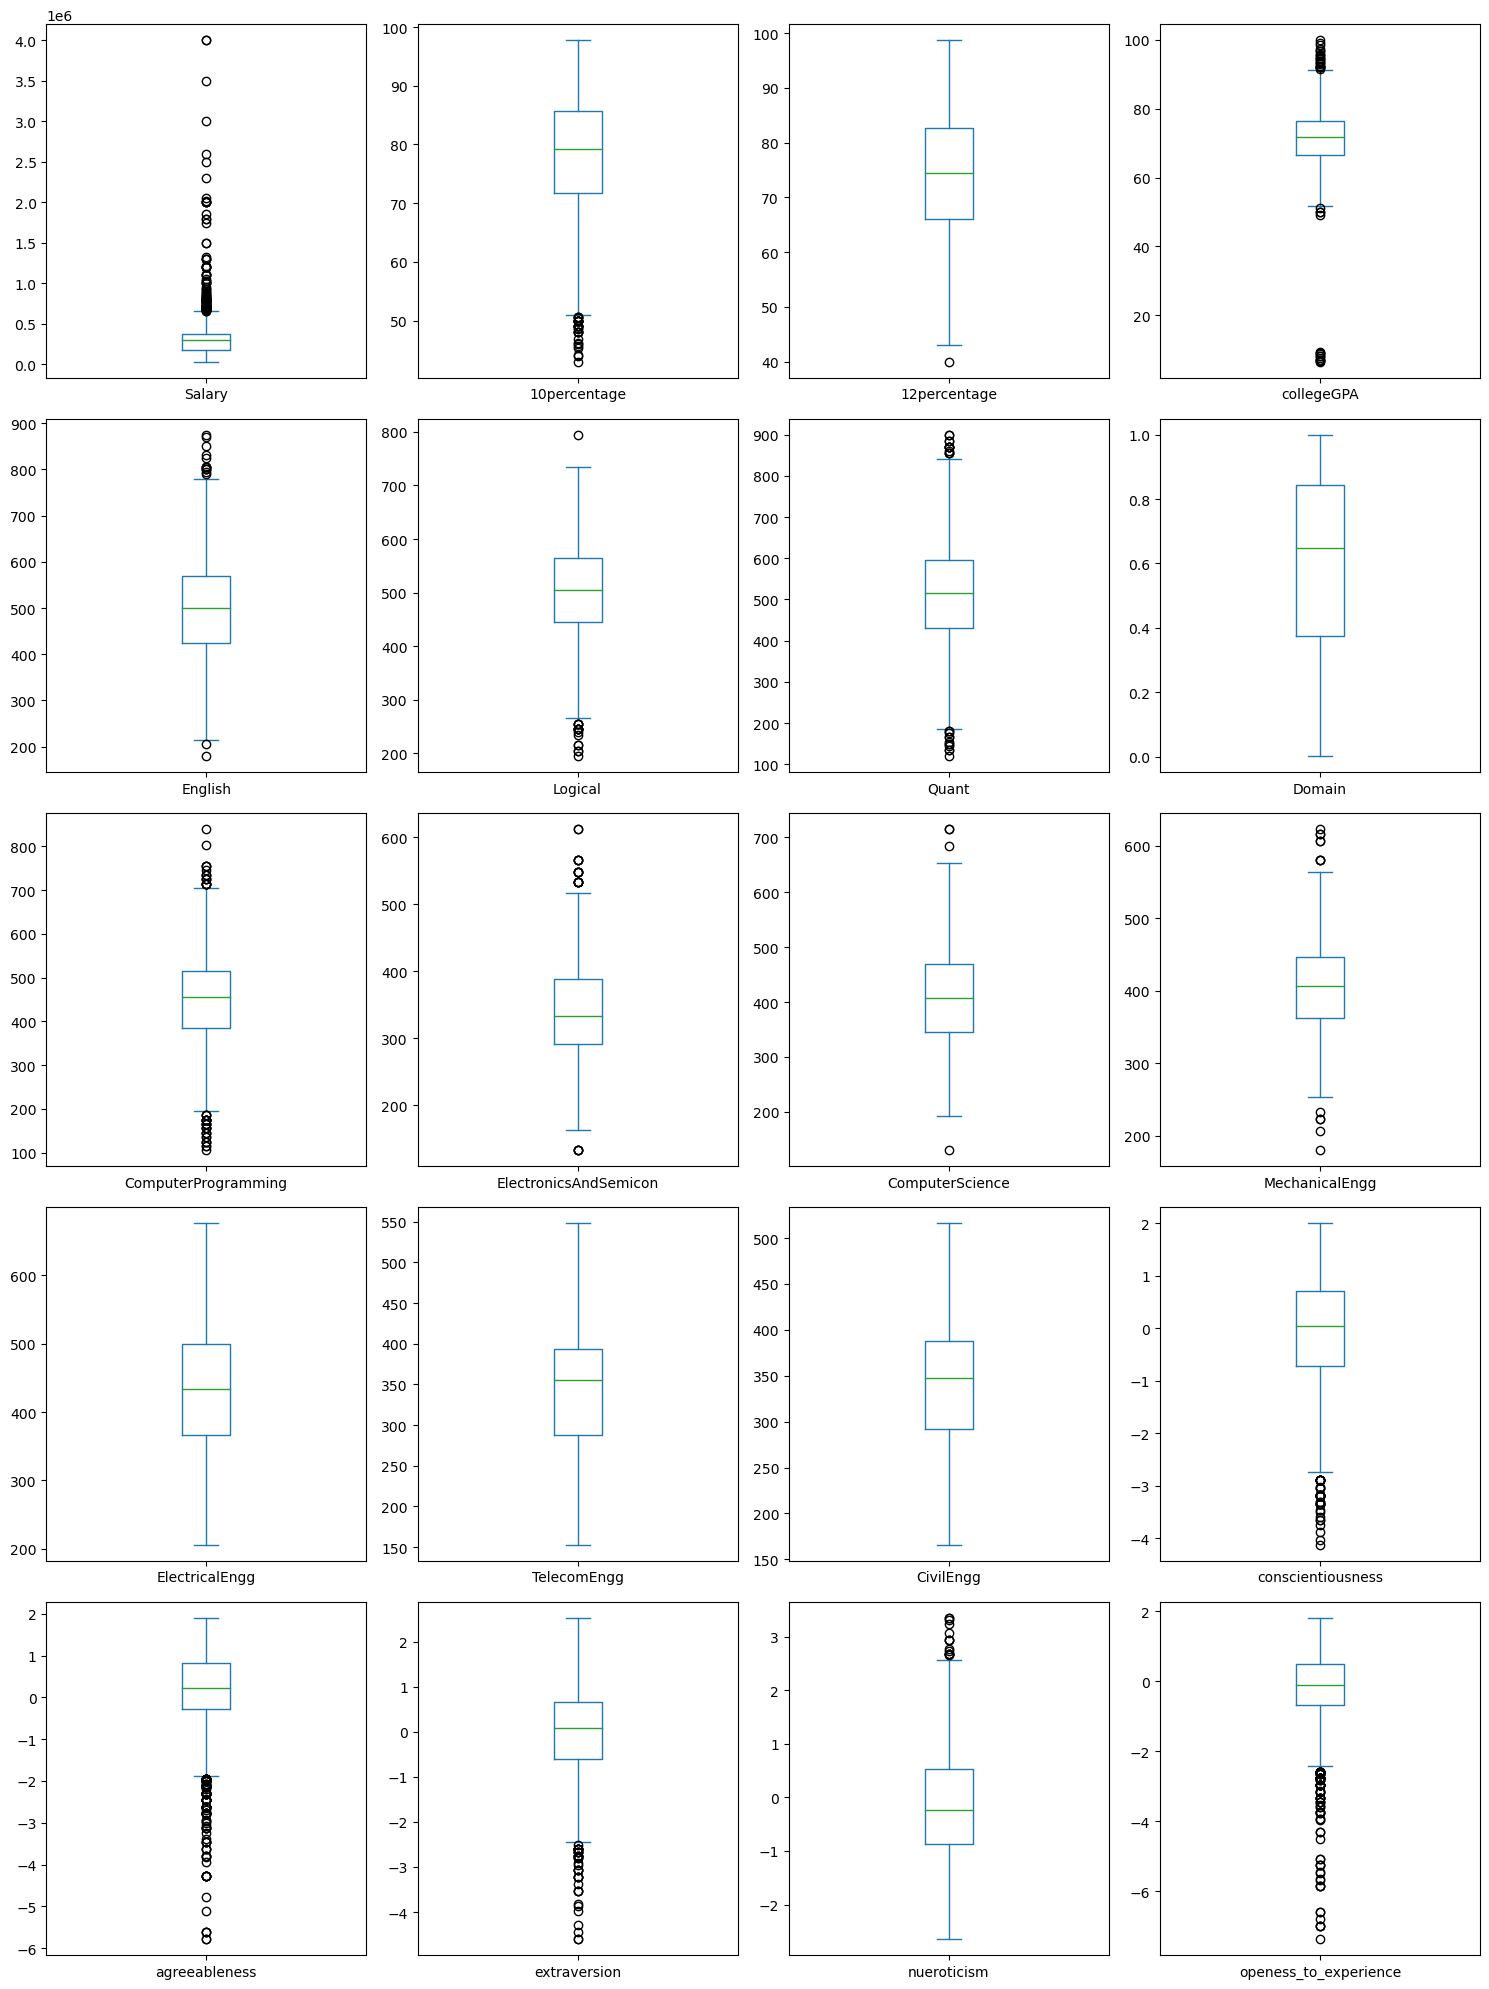

In [10]:
numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
numerical_df = df1[numerical_columns]

# Calculating layout size for better spacing
num_cols = len(numerical_df.columns)
num_rows = (num_cols + 3) // 4  # 4 plots per row

# Plotting individual box plots for each numerical column
plt.figure(figsize=(15, 4*num_rows))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(num_rows, 4, i+1)
    numerical_df[col].plot(kind='box', vert=True)
plt.tight_layout()
plt.show()


# UNIVARIATE ANALYSIS - NUMERICAL

# Upon visually analysing the salary column, it is right skewed and needs some fixing to analyse it.

Text(0.5, 1.0, 'Salary')

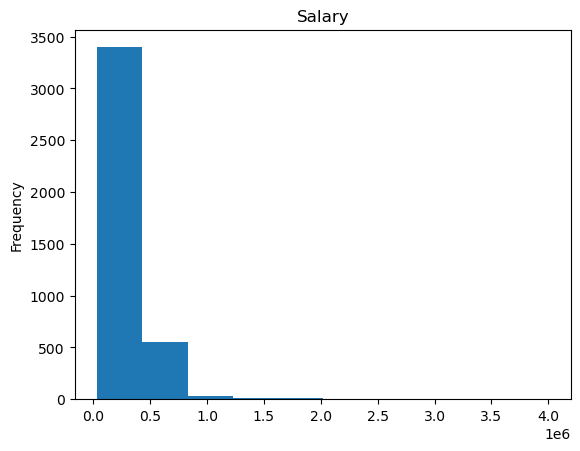

In [11]:
df1['Salary'].plot(kind='hist')
plt.title('Salary')

# Salary column clearly has a ton of outliers and hence needs some cleaning. As of this, there are far outliers in other cloumns such as agreeableness, openness_to_experience and in collegeGPA.

<AxesSubplot:>

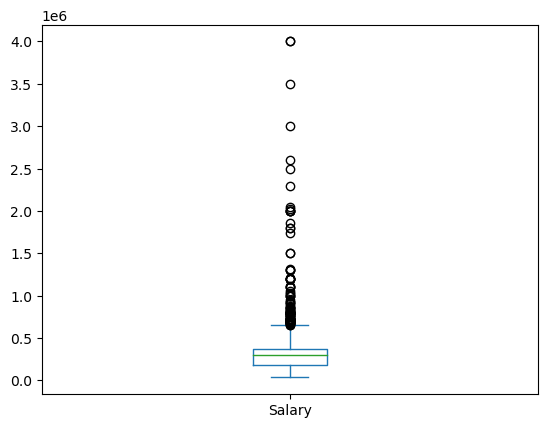

In [12]:
df1['Salary'].plot(kind='box')

## I removed the far outliers in salary using IQR method. Now the outliers are much less and are closely bound to the range.

<AxesSubplot:>

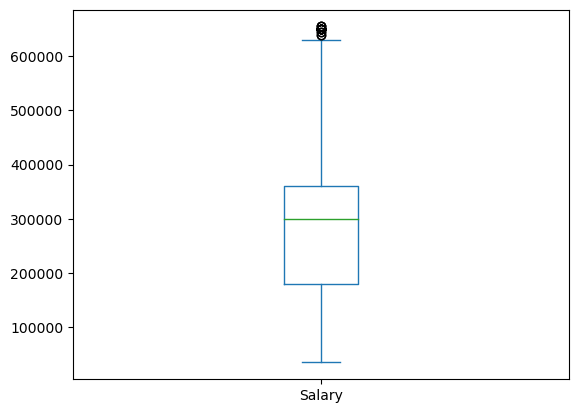

In [13]:
# IQR OUTLIER REMOVAL -  SALARY 

q1 = df1['Salary'].quantile(0.25)
q3 = df1['Salary'].quantile(0.75)

iqr = q3 - q1

income_lower_bound = q1 - 1.5*iqr
income_upper_bound = q3 + 1.5*iqr


df2 = df1[(df1['Salary']>=income_lower_bound) & (df1['Salary']<=income_upper_bound)]

df2['Salary'].plot(kind='box')

## The KDE plot of salary column shows the presence of a bell curve like shape i.e a normal distribution.

Text(0.5, 1.0, 'Salary')

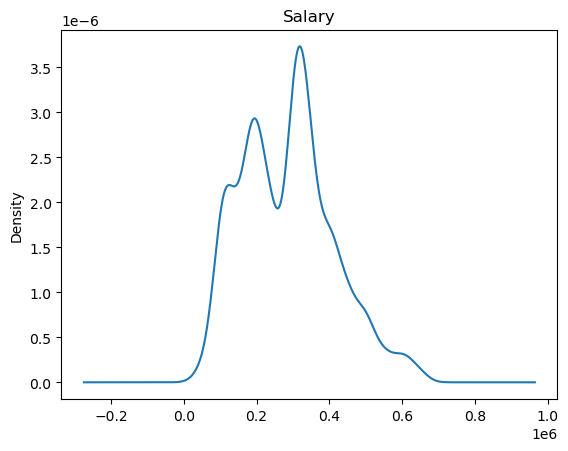

In [14]:
df2['Salary'].plot(kind='kde')
plt.title('Salary')

## I have plotted the box plots for all variables and this time the outliers are much less and is better to perform analysis.

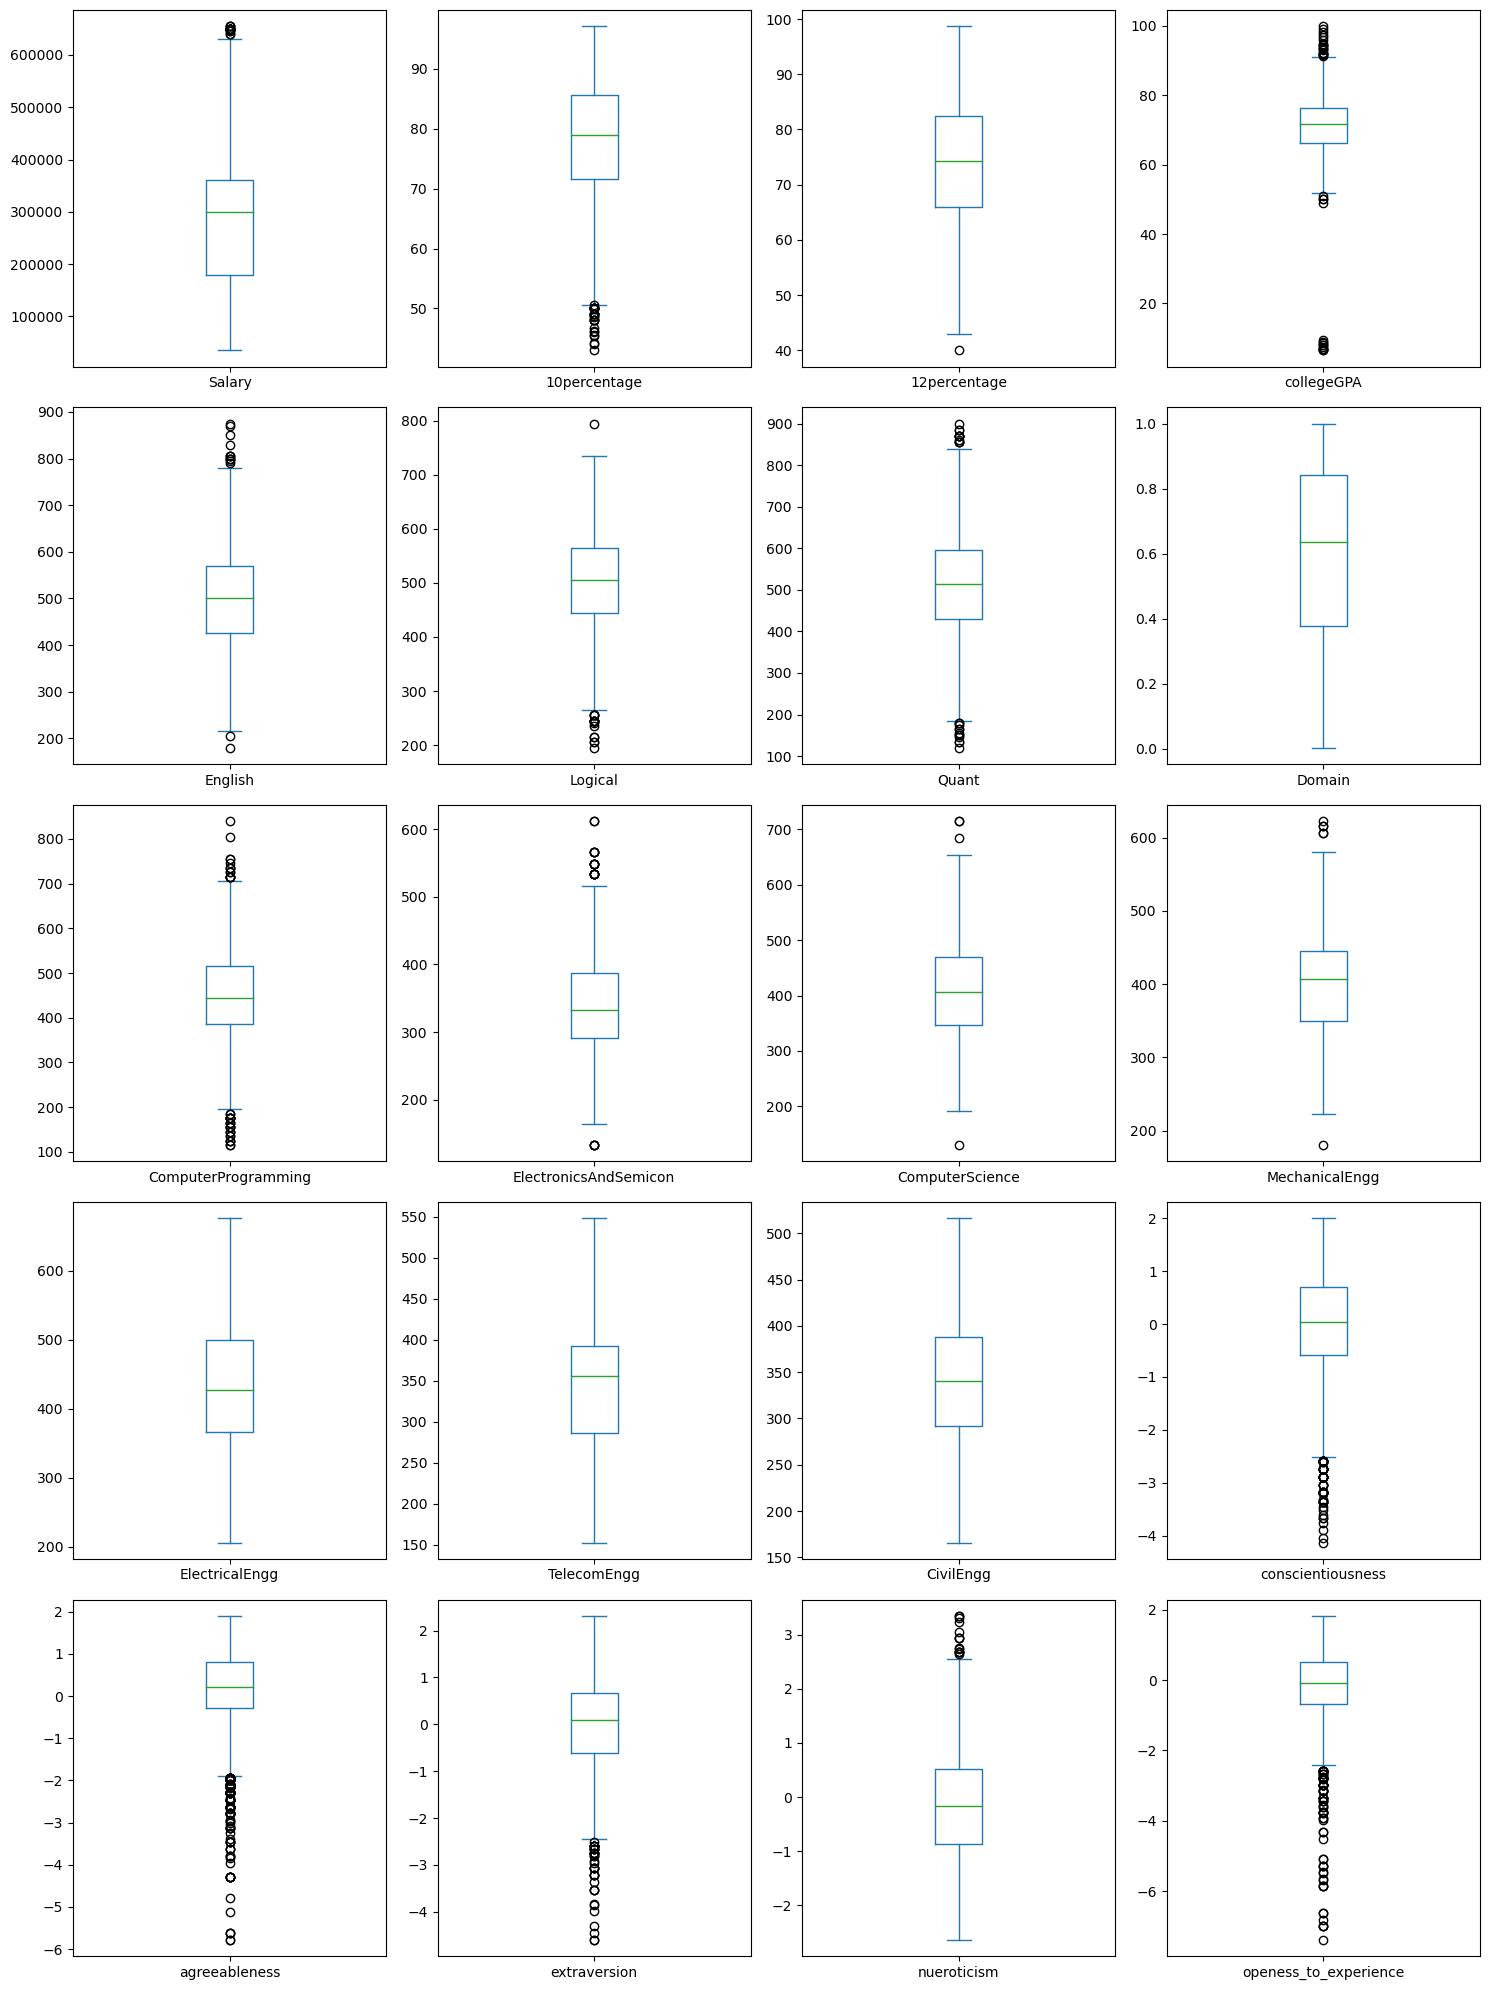

In [15]:
numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
numerical_df = df2[numerical_columns]

# Calculating layout size for better spacing
num_cols = len(numerical_df.columns)
num_rows = (num_cols + 3) // 4  # 4 plots per row

# Plotting individual box plots for each numerical column
plt.figure(figsize=(15, 4*num_rows))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(num_rows, 4, i+1)
    numerical_df[col].plot(kind='box', vert=True)
plt.tight_layout()
plt.show()

## I have plotted histograms for all numerical attributes and most of them show a normal distribution except for a few like MechanicalEngg,conscientiousness, agreeableness, extraversion and openness_to_experience

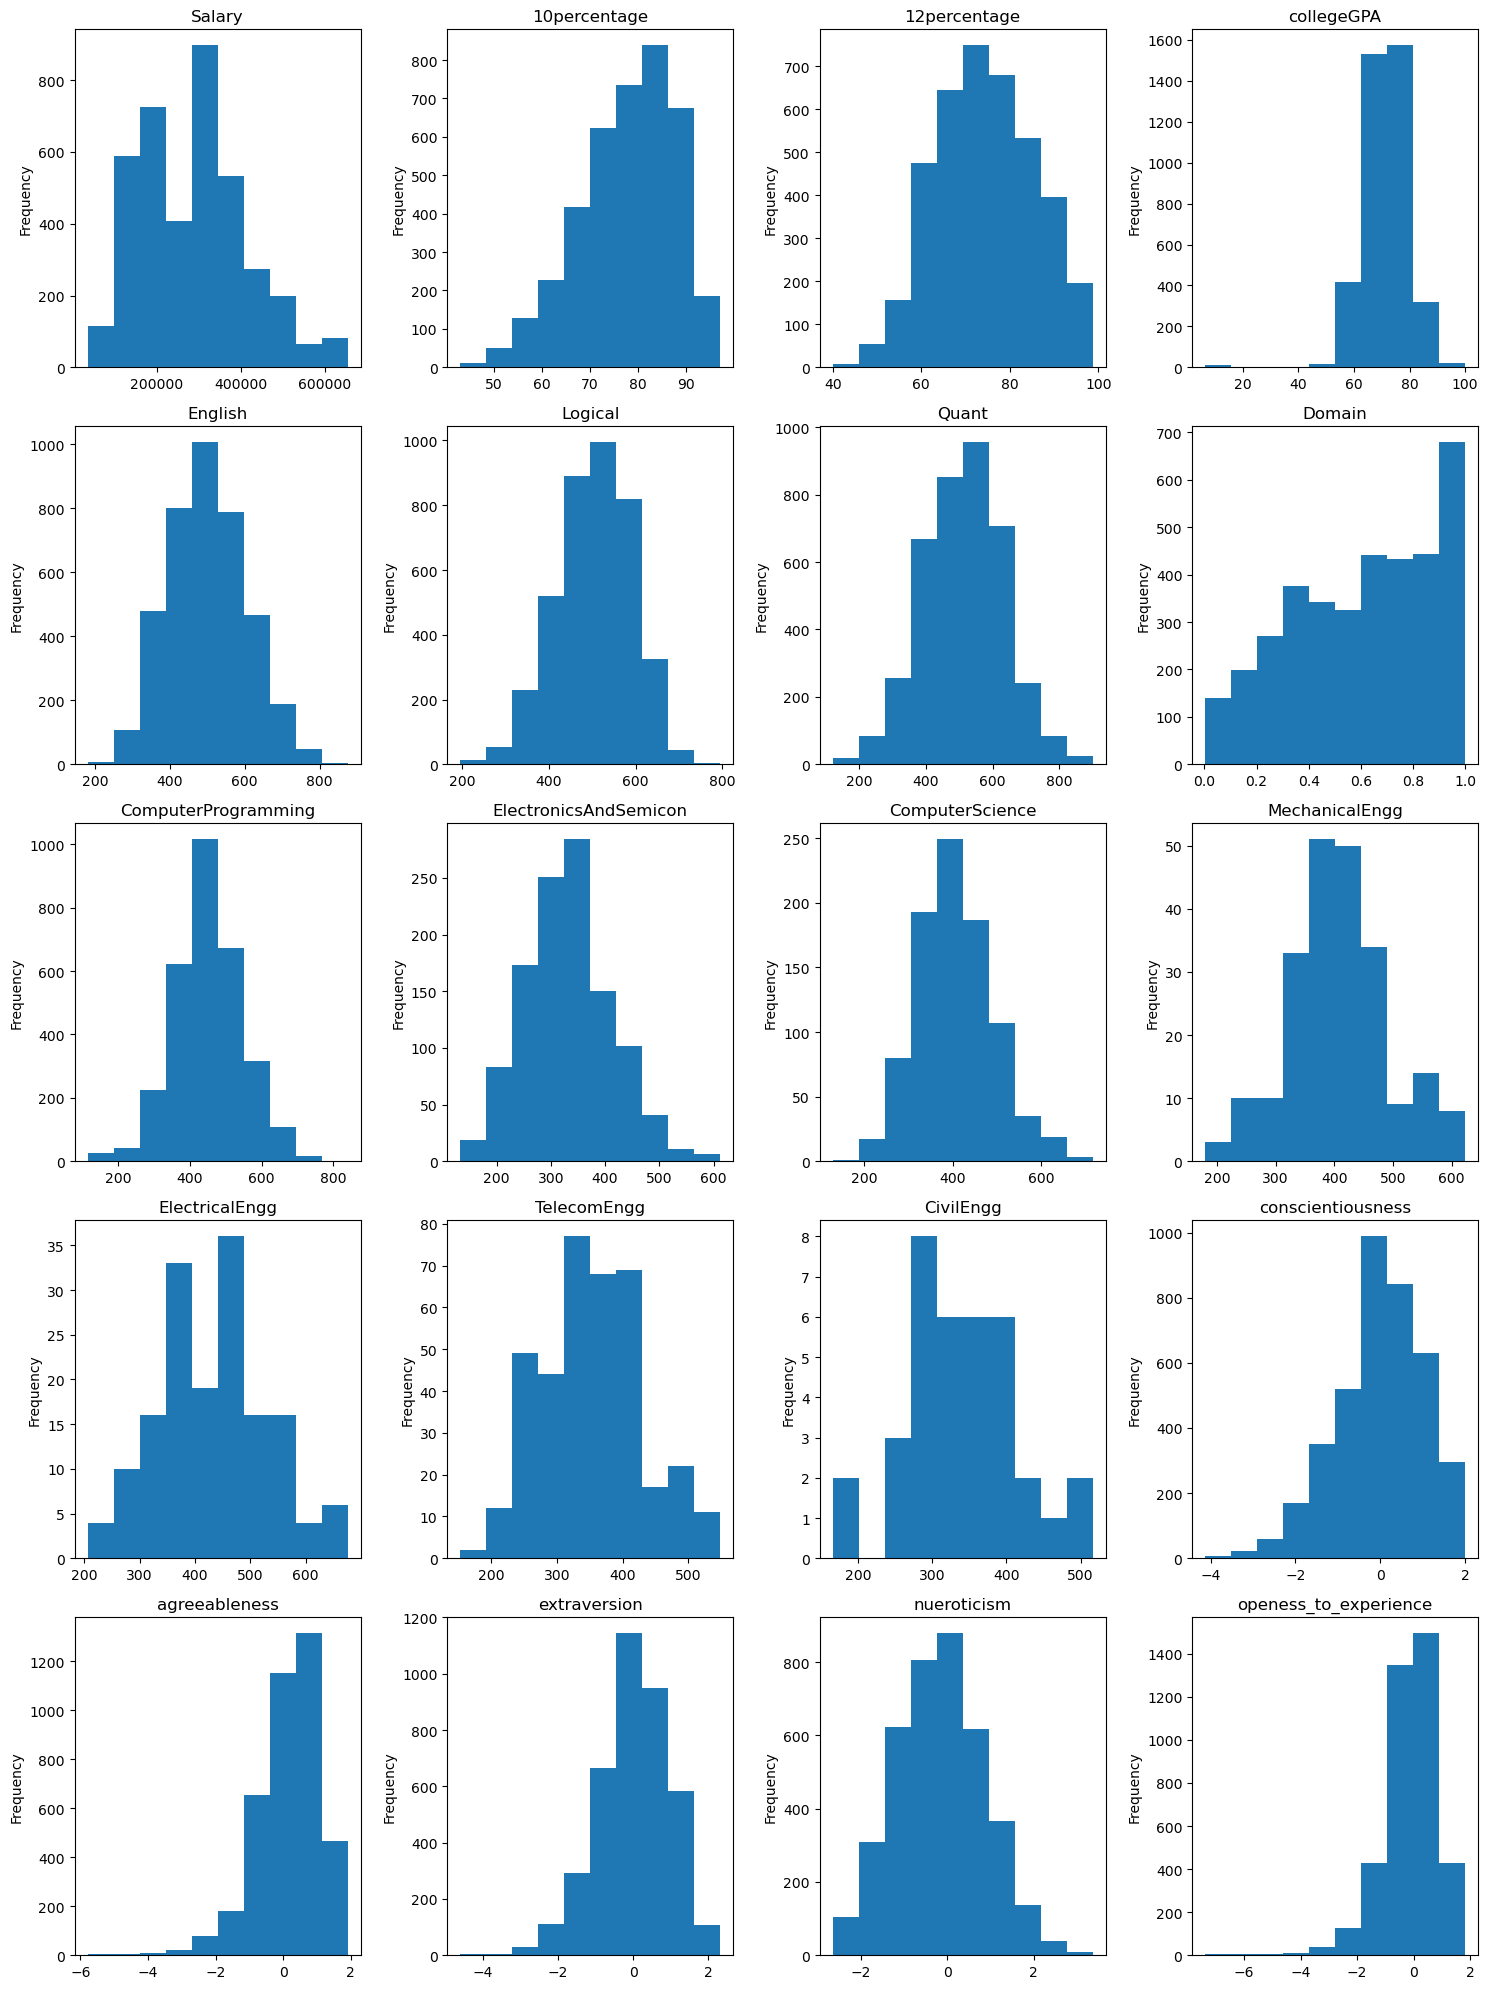

In [16]:
numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
numerical_df = df2[numerical_columns]

# Calculating layout size for better spacing
num_cols = len(numerical_df.columns)
num_rows = (num_cols + 3) // 4  # 4 plots per row

# Plotting individual box plots for each numerical column
plt.figure(figsize=(15, 4*num_rows))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(num_rows, 4, i+1)
    numerical_df[col].plot(kind='hist')
    plt.title(col)
plt.tight_layout()
plt.show()

## Next, I moved on to the categorical columns, I have looked into the unique values in JobCity and noticed there are few mispellings and repeated values because of case sensitivity.

In [17]:
df2['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Manesar', 'Hyderabad',
       'Banglore', 'Noida', 'Kolkata', 'Pune', 'Gurgaon', nan, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Thiruvananthapuram', 'Punchkula', 'Bhubaneshwar',
       'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum',
       'kolkata', 'Gandhi Nagar', 'Una', 'Daman and Diu', 'chennai',
       'GURGOAN', 'vsakhapttnam', 'pune', 'Nagpur', 'Bhagalpur',
       'new delhi - jaisalmer', 'Coimbatore', 'Ahmedabad', 'Kochi/Cochin',
       'Bankura', 'Bengaluru', 'Mysore ', 'Kanpur ', 'jaipur', 'Gurgaon ',
       'bangalore', 'CHENNAI', 'Vijayawada', 'Kochi', 'Beawar', 'Alwar',
       'NOIDA', 'Greater noida', 'Siliguri ', 'raipur', 'gurgaon',
       'Bhopal', 'Faridabad', 'J

## I fixed the inconsistencies in JobCity column by using Levenshtein Distance method.

In [18]:
def correct_spelling_errors(target_word="", choices = [], threshold = 80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word
    
jobcity_choices = ['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar', 'Hyderabad', 'Noida', 
                   'Kolkata', 'Pune', 'Mohali', 'Jhansi', 'Delhi', 'Bhubaneswar', 'Navi Mumbai', 
                   'Mumbai', 'Mangalore', 'Rewari', 'Ghaziabad', 'Bhiwadi', 'Mysore',
                   'Rajkot', 'Greater Noida', 'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram',
                   'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum', 'Gandhi Nagar',
                   'Unnao', 'Daman and Diu', 'Visakhapatnam', 'Nagpur', 'Bhagalpur', 'Jaisalmer', 
                   'Ahmedabad', 'Kochi', 'Bankura', 'Kanpur', 'Vijayawada', 'Beawar', 
                   'Alwar', 'Siliguri', 'Raipur', 'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 
                   'Muzaffarpur', 'Bulandshahar', 'Haridwar', 'Raigarh', 'Jabalpur', 'Aurangabad',
                   'Belgaum', 'Dehradun', 'Rudrapur', 'Jamshedpur', 'Vizag', 'Dharamshala', 'Hissar',
                   'Ranchi', 'Madurai', 'Chandigarh', 'Australia', 'Cheyyar', 'Sonepat', 'Pantnagar', 
                   'Jagdalpur', 'Angul', 'Baroda', 'Ariyalur', 'Jowai', 'Neemrana', 'Tirupathi',
                   'Calicut', 'Gandhinagar', 'Dubai', 'Ahmednagar', 'Nashik', 'Bellary', 'Ludhiana',
                   'Muzaffarnagar', 'Gagret', 'Gwalior', 'Sonipat', 'Bareli', 'Hospet', 'Miryalaguda', 
                   'Dharuhera', 'Meerut', 'Ganjam', 'Hubli', 'Agra', 'Trichy', 'Ongole', 
                   'Sambalpur', 'Pondicherry', 'Bundi', 'Sadulpur', 'Bikaner', 'Vadodara', 'Asansol',
                   'Tirunelvelli', 'Ernakulam', 'Bilaspur', 'Chandrapur', 'Nanded', 'Dharmapuri', 
                   'Vandavasi', 'Rohtak', 'Technopark', 'Bharuch', 'Tornagallu', 'Jaspur',
                   'Burdwan', 'Shimla', 'Jammu', 'Shahdol', 'Muvattupuzha', 'Al Jubail', 'Saudi Arabia',
                   'Kalmar', 'Sweden', 'Ratnagiri', 'Jhajjar', 'Gulbarga', 'Nalagarh', 'Gonda', 'Kharagpur', 
                   'Joshimath', 'Bathinda', 'Johannesburg', 'Kala Amb', 'Karnal', 'London', 'Kota', 'Panchkula',
                   'Baddi', 'Nagari', 'Mettur', 'Durgapur', 'Pondi', 'Surat', 'Kurnool', 'Kolhapur', 'Bhilai',
                   'Bahadurgarh', 'Rayagada', 'Odisha', 'Kakinada', 'Varanasi', 'Nellore', 'Howrah', 'Ambala', 
                   'Khopoli', 'Roorkee', 'Allahabad', 'Jalandhar', 'Vapi', 'Pilani', 'Muzzafarpur', 'Ras Al Khaimah',
                   'Singaruli', 'Phagwara', 'Baripada', 'Yamuna Nagar', 'Sampla', 'Guwahati', 'Rourkela', 
                   'Vellore', 'Dausa', 'Latur', 'Mainpuri', 'Dammam', 'Haldia', 'Rae Bareli',
                   'Patiala', 'Gorakhpur', 'Karad', 'Rajpura', 'Haryana', 'Asifabad']

In [19]:
df2['JobCity'] = df2['JobCity'].apply(lambda jobcity : correct_spelling_errors(str(jobcity), jobcity_choices))
df2

C:\Users\tejes\AppData\Local\Temp\ipykernel_29196\1317253058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['JobCity'] = df2['JobCity'].apply(lambda jobcity : correct_spelling_errors(str(jobcity), jobcity_choices))


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,NaT,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,NaT,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,NaN,466.0,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,NaT,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,NaN,233.0,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,300000,2014-06-01,NaT,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.00,state board,2,B.Tech/B.E.,electronics and communication engineering,76.32,0,Karnataka,2014.0,560,555,620,NaN,645.0,NaN,407.0,NaN,NaN,NaN,NaN,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01,software engineer,Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,0,Haryana,2010.0,365,334,475,0.276047,345.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,2,B.Tech/B.E.,electronics and communication engineering,77.30,1,Telangana,2013.0,415,410,535,0.881620,325.0,420.0,NaN,NaN,NaN,NaN,NaN,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,NaT,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,B.Tech/B.E.,computer engineering,70.00,0,Orissa,2012.0,475,475,465,0.488348,405.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabad,f,1992-03-20,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,computer science & engineering,70.42,1,Karnataka,2014.0,450,410,320,0.744758,445.0,NaN,438.0,NaN,NaN,NaN,NaN,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [20]:
# UNIVARIATE ANALYSIS - CATEGORICAL

## Later I moved on to look into Designation columns cardinality. It is observed that software engineers and developers occupy 20% of the data, followed by system engineers and programmer analaysts that occupt around 10% of the data.

In [21]:
df2['Designation'].value_counts()

software engineer           525
software developer          263
system engineer             205
programmer analyst          139
systems engineer            116
                           ... 
desktop support engineer      1
cad drafter                   1
noc engineer                  1
human resources intern        1
jr. software developer        1
Name: Designation, Length: 416, dtype: int64

In [22]:
counts = df2['Designation'].value_counts(normalize=True)
counts

software engineer           0.134996
software developer          0.067627
system engineer             0.052713
programmer analyst          0.035742
systems engineer            0.029828
                              ...   
desktop support engineer    0.000257
cad drafter                 0.000257
noc engineer                0.000257
human resources intern      0.000257
jr. software developer      0.000257
Name: Designation, Length: 416, dtype: float64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3889 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3889 non-null   int64         
 1   DOJ                    3889 non-null   datetime64[ns]
 2   DOL                    2087 non-null   datetime64[ns]
 3   Designation            3889 non-null   object        
 4   JobCity                3889 non-null   object        
 5   Gender                 3889 non-null   object        
 6   DOB                    3889 non-null   datetime64[ns]
 7   10percentage           3889 non-null   float64       
 8   10board                3889 non-null   object        
 9   12graduation           3889 non-null   object        
 10  12percentage           3889 non-null   float64       
 11  12board                3889 non-null   object        
 12  CollegeTier            3889 non-null   object        
 13  Deg

## I built a function that calculates the frequenct, number of unique values, displays the unique values and the cardinality for each categorical column.

## From JobCity, we can observe that Banglore hold the highest share of jobs followed by Thiruvananthapuram, Noida, Hyderabad and Pune. Most of the students in 10 Board and 12 Board are from CBSE Board. About 92% of the students did B.Tech which is the highest amony all. The least is M.Sc Tech which is around 0.03% only. 

In [24]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data :
        print("*"*12,col_name,"*"*12)
        print(discrete_data[col_name].agg(['count','nunique','unique']))
        print('Value Counts: \n',discrete_data[col_name].value_counts(normalize=True))
        print()

discrete_univariate_analysis(df2[['Designation','JobCity','10board','12board','Gender','CollegeTier','Degree','Specialization','CollegeCityTier'
                                 ,'CollegeState','GraduationYear']])

************ Designation ************
count                                                   3889
nunique                                                  416
unique     [senior quality engineer, assistant manager, s...
Name: Designation, dtype: object
Value Counts: 
 software engineer           0.134996
software developer          0.067627
system engineer             0.052713
programmer analyst          0.035742
systems engineer            0.029828
                              ...   
desktop support engineer    0.000257
cad drafter                 0.000257
noc engineer                0.000257
human resources intern      0.000257
jr. software developer      0.000257
Name: Designation, Length: 416, dtype: float64

************ JobCity ************
count                                                   3889
nunique                                                  187
unique     [Bangalore, Indore, Chennai, Manesar, Hyderaba...
Name: JobCity, dtype: object
Value Counts: 
 Bangalore    

## I have plotted count plots for the categorical columns and observed that there are a lot more males than females. Males are about 75% and females are about 25% only. There are more number of Tier 2 colleges than tier 1 significantly. Most of the colleges are from Uttar Pradesh and the least are from Goa, Sikkim, Meghalaya and Union Territories. Most people pursued courses like ECE, CSE, Information Technology and Computer Engineering. Most of the students have graduated their 12th Class in 2009 and there fore finished their college graduation in 2013.

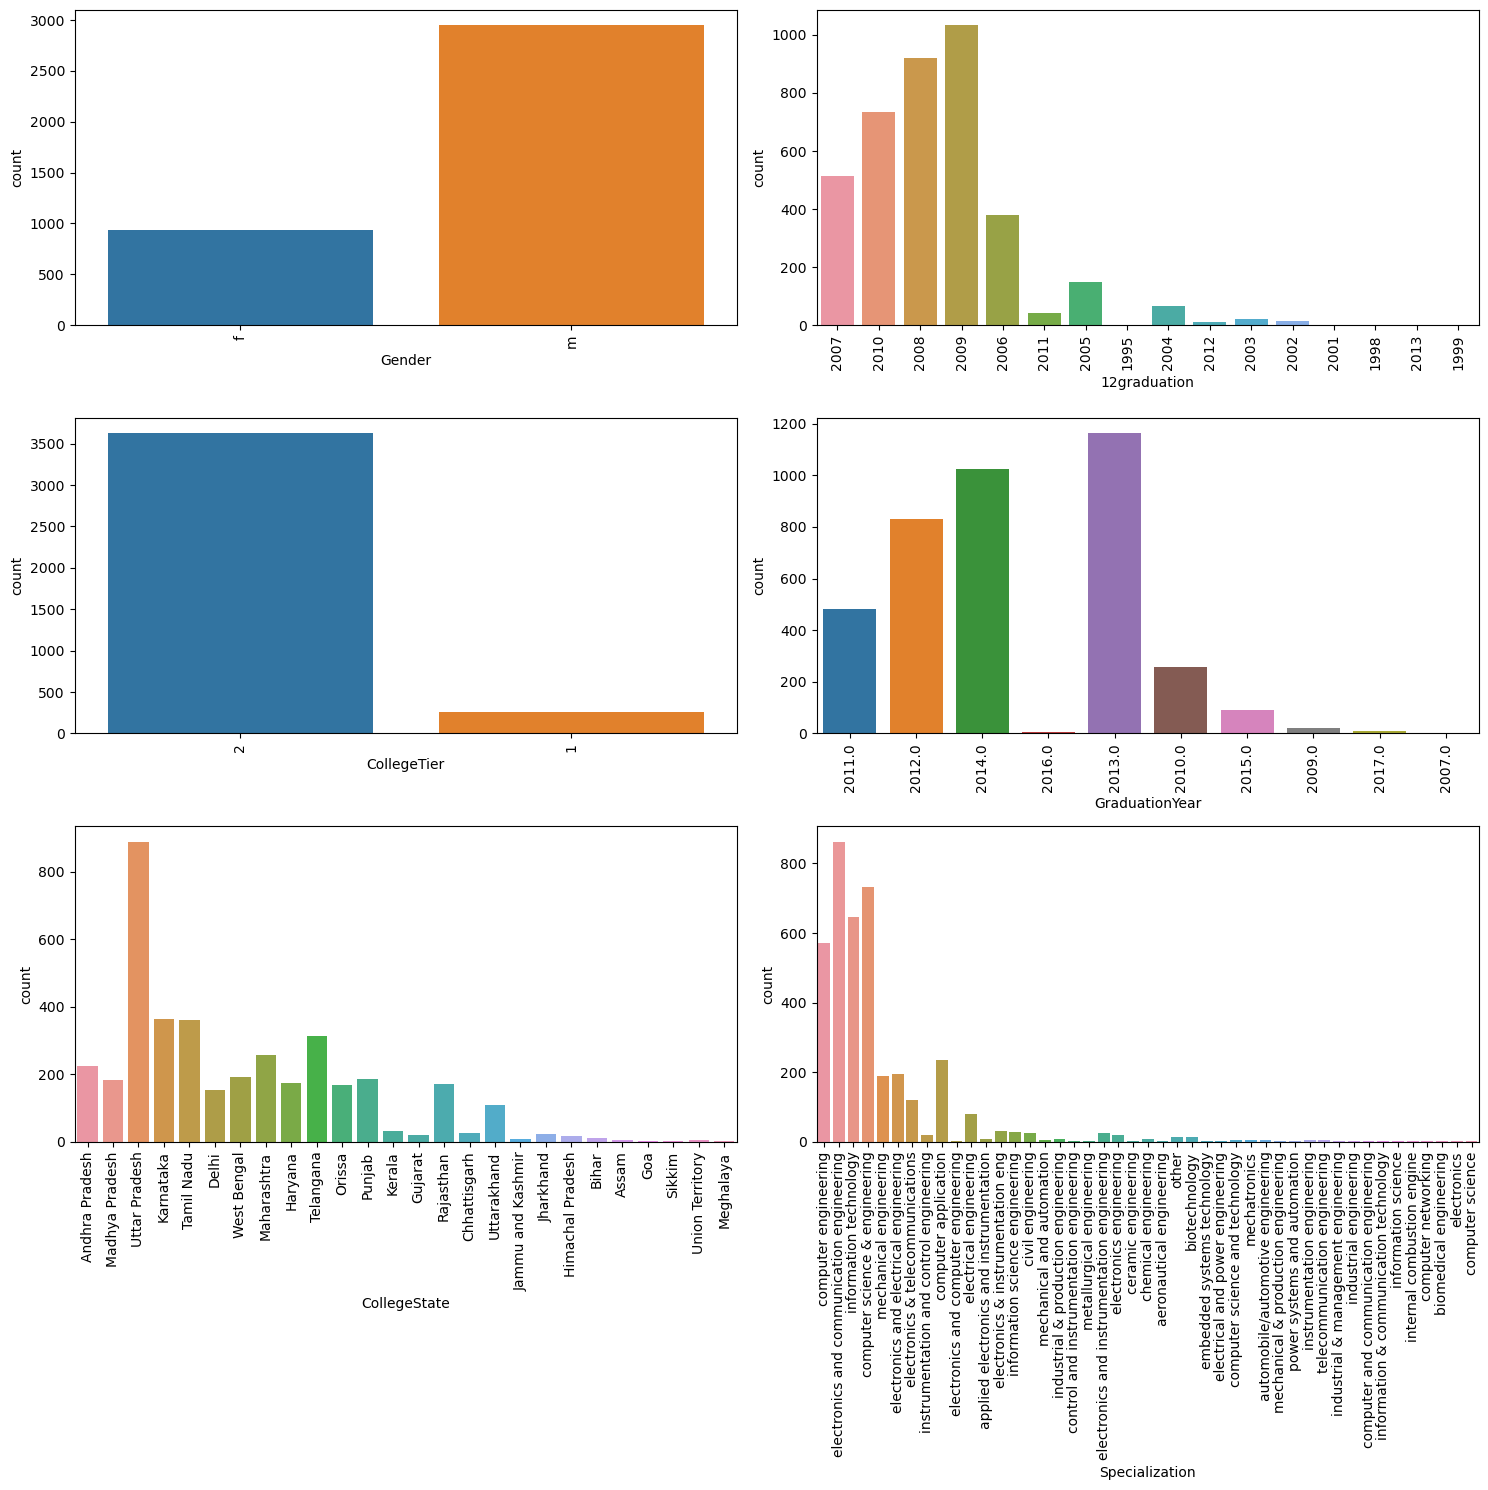

In [25]:
categorical_columns = ['Gender', '12graduation', 'CollegeTier', 'GraduationYear', 'CollegeState', 'Specialization']
cat_df = df2[categorical_columns]

cat_cols = len(cat_df.columns)
cat_rows = (cat_cols + 1) // 2  

plt.figure(figsize=(5*cat_rows, 15))
for i, col in enumerate(cat_df.columns):
    plt.subplot(cat_rows, 2, i+1)
    sns.countplot(data=cat_df, x=col)
    plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS -  NUM VS CAT - Salary vs Jobcity - Salary vs Gender - Salary vs Degree - Salary vs Designation - Salary vs CollegeState

## A box plot between Salary and JobCity is plotted filtered to top 10 JobCities. It is clearly noticeable that Mumabai has the highest salaries surpassed by a small margin from pune and banglore. Makes sense as Cost of living is high in mumbai and looking into the lowest salaries, they are in Delhi.

<AxesSubplot:title={'center':'Salary'}, xlabel='JobCity'>

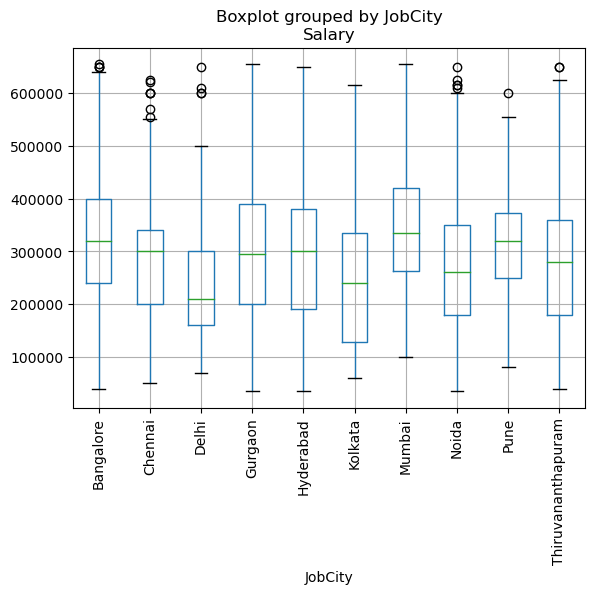

In [26]:
top_10_job_cities = df2['JobCity'].value_counts().head(10).index

df_top_10_cities = df2[df2['JobCity'].isin(top_10_job_cities)]

df_top_10_cities.boxplot(by='JobCity', column='Salary', rot=90)  # rot=90 to rotate x-axis labels for better readability

## A box plot between Salary and Gender is plotted. It is noticeable that there is no partiality shown in terms of salaries between Male and Females, which is an important point to note.

<AxesSubplot:title={'center':'Salary'}, xlabel='Gender'>

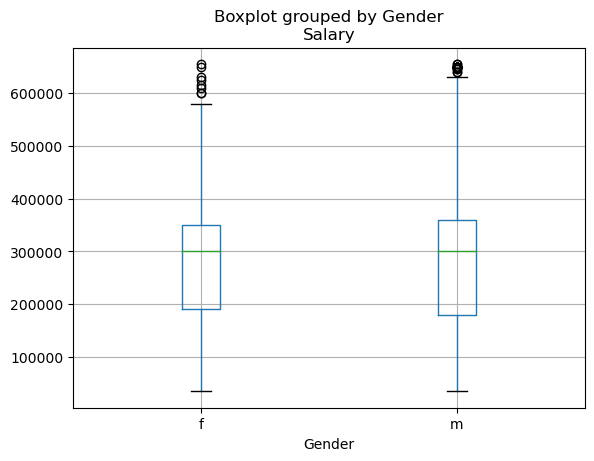

In [27]:
df2.boxplot(by='Gender', column='Salary')

## A box plot between Salary and Degree holding is plotted. We can see that those with a M.Sc or M.Tech Degree earn the most over a slight margin from those with a B.Tech Degree. The lowest earners are holders of MCA degree by a significant margin of close to 1 LPA.

<AxesSubplot:title={'center':'Salary'}, xlabel='Degree'>

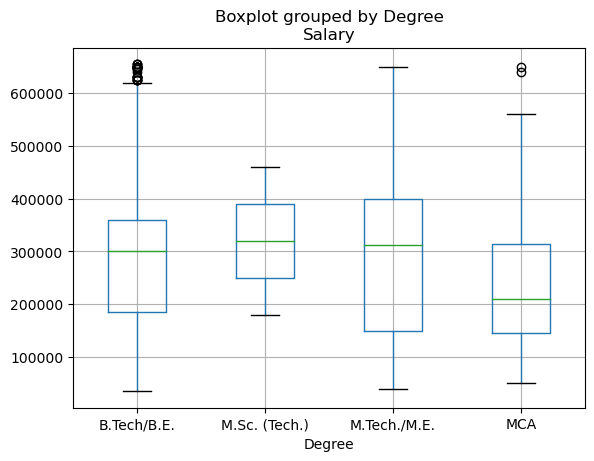

In [28]:
df2.boxplot(by='Degree', column='Salary')

## A box plot between Salary and CollegeState is plotted. Surprisingly, jobs in J&K have the highest salaries. Jobs in Union Territories have the lowest salaries.

<AxesSubplot:title={'center':'Salary'}, xlabel='CollegeState'>

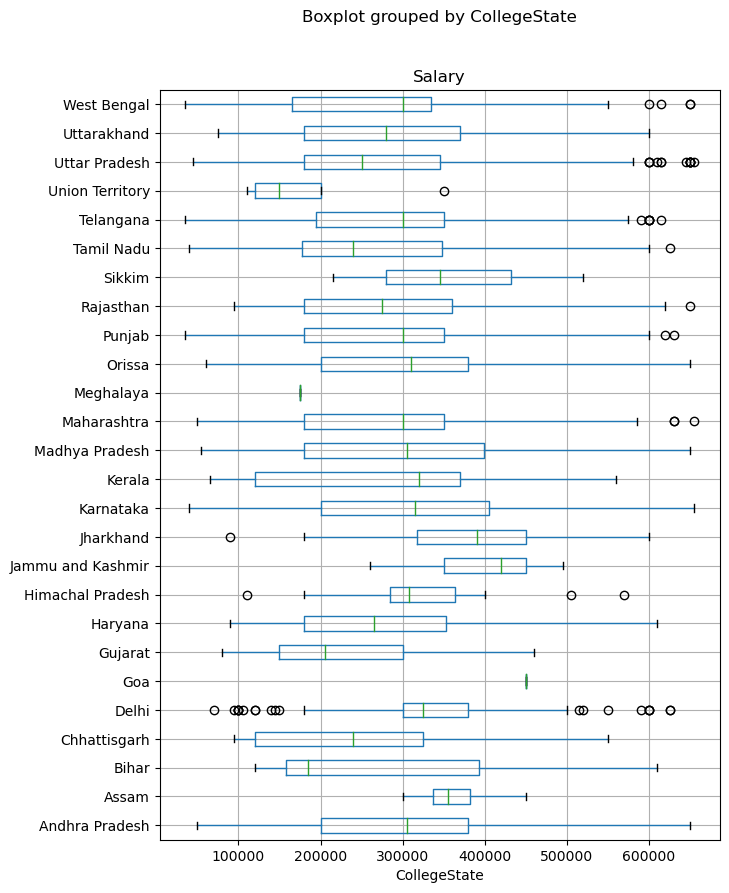

In [29]:
df2.boxplot(by='CollegeState', column='Salary', vert=False, figsize=(7,10))

### The hypothesis by the TOI articles is correct. Those with jobs as a programming analyst, software engineers and hardware engineer and associate engineer can earn upto 2.5 - 3 laksh per annum. From the boxplot, we can see that all four are earing atleast 3LPA per annum.

<AxesSubplot:title={'center':'Salary'}, xlabel='Designation'>

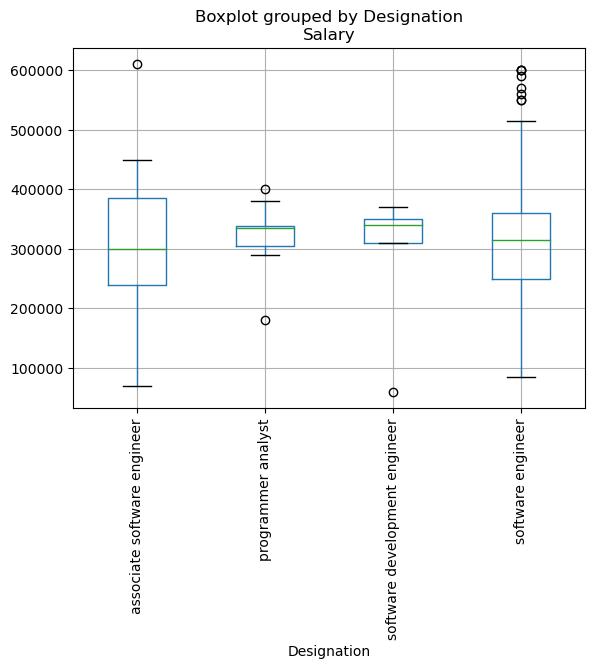

In [30]:
#Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up 
# jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 
# 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you

# programmer analyst, software engineer, software developer, 'software development engineer', 'associate software engineer'

df_cse = df2[(df2['Specialization'] == 'computer science & engineering') | (df2['Specialization'] == 'computer science') ]

df_cse_jobs = df_cse[df_cse['Designation'].isin(['software engineer', 'programmer analyst',
                                                'software development engineer', 'associate software engineer'])]

df_cse_jobs.boxplot(by='Designation', column='Salary', rot = 90)

# BIVARIATE ANALYSIS - 
# NUM VS NUM - SALARYv10Percent - SALARYv12Percent -SALARYvCollegeGPA

## A box plot between Salary and collegeGPA is plotted. The GPA in college doesnt play any role in determining the salary of an individual. From the graph, there are people who have a good score that earn around 1LPA as well as close to 6LPA 

<AxesSubplot:xlabel='Salary', ylabel='collegeGPA'>

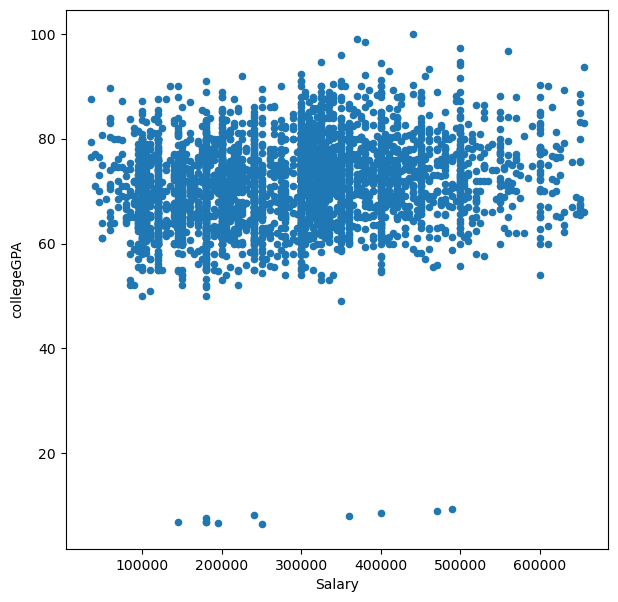

In [31]:
df2.plot(kind='scatter', x='Salary', y='collegeGPA', figsize=(7, 7))

## A box plot between Salary and 10percentage is plotted. The 10percentage in college doesnt play any role in determining the salary of an individual. From the graph, there are people who have a good score that earn around 1LPA as well as close to 6LPA 

<AxesSubplot:xlabel='Salary', ylabel='10percentage'>

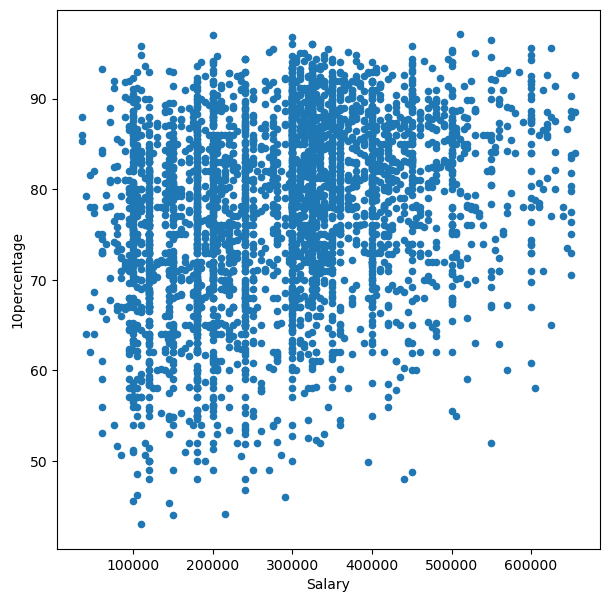

In [32]:
df2.plot(kind='scatter', x='Salary', y='10percentage', figsize=(7, 7))

##  A box plot between Salary and 12percentage is plotted. The 12percentage in college doesnt play any role in determining the salary of an individual. From the graph, there are people who have a good score that earn around 1LPA as well as close to 6LPA 

<AxesSubplot:xlabel='Salary', ylabel='12percentage'>

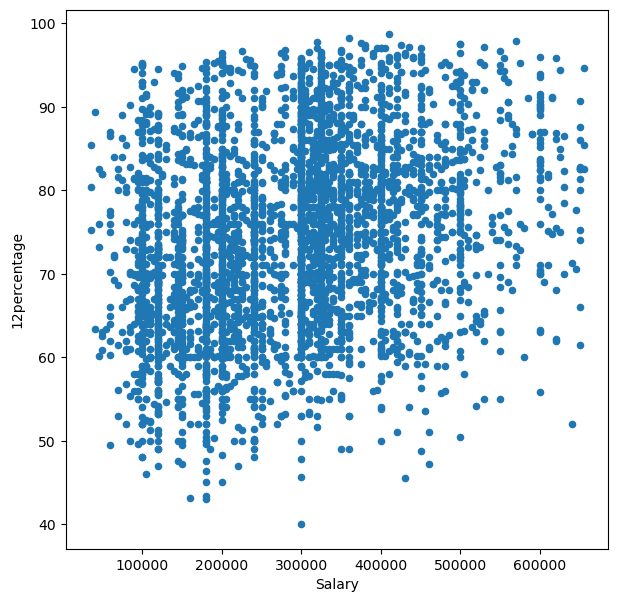

In [33]:
df2.plot(kind='scatter', x='Salary', y='12percentage', figsize=(7, 7))

# BIVARIATE ANALYSIS - 
# CAT VS CAT - SpecializationvCollegeTier - SpecializationvGender

## A box plot between Specialization and CollegeTier is plotted. We can observe that most of the students are from Tier 2 colleges. Some courses like metallurgical engineering, information science, and ceramic engineering are offered by only tier 1 colleges. Specializations like mechanical and production engineering, internal comustin endinge, instrumentation enginerring, and information science engineering, industrial management engineering, embedded systems technology, aeronautics and electronics are offered only by tier 2 colleges.

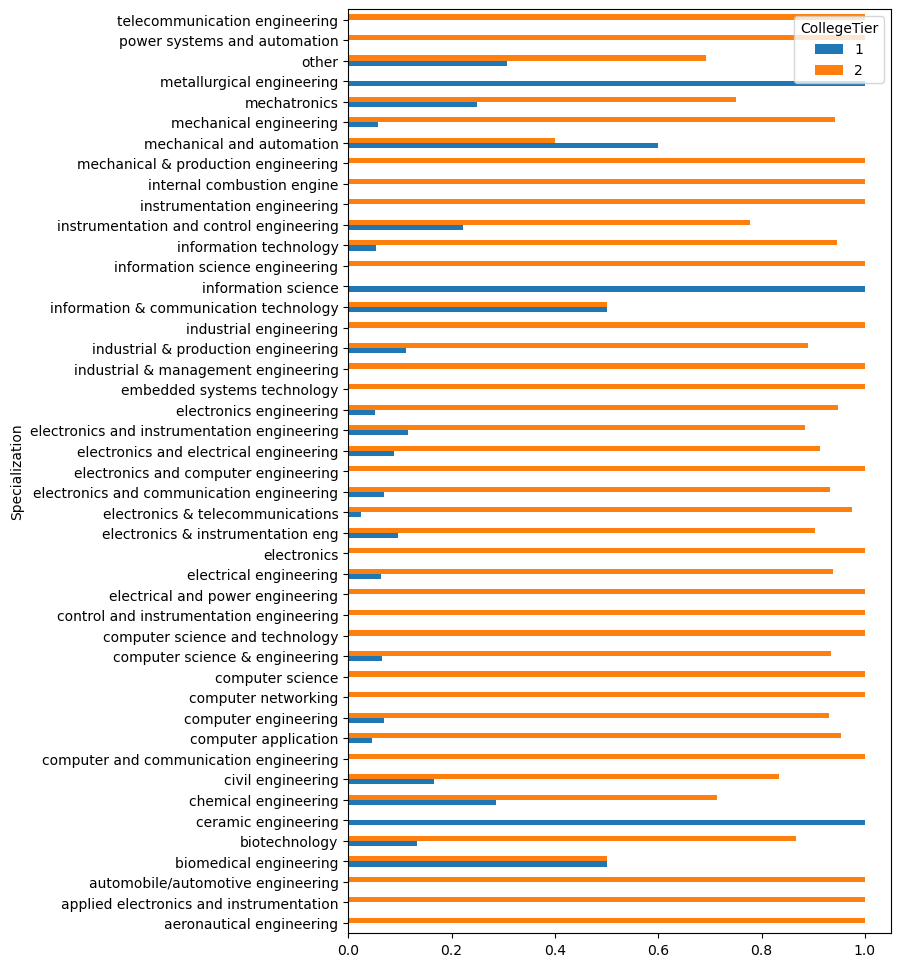

In [34]:
tab = pd.crosstab(df2['Specialization'], df2['CollegeTier'], normalize='index')
tab.plot(kind='barh', figsize = (7,12))
plt.show()

## A box plot between Specialization and Gender is plotted. We can observe that most of the students are Males. Biomedical engineering and information and communication technology courses are chosen by only females. Industrial engineering & computer science course has equal number of males and females. Mechanical engineering has the lowest ration of males and females. Courses that relate to mechanical, automotive, aeronuatical, industrial and management have less females.

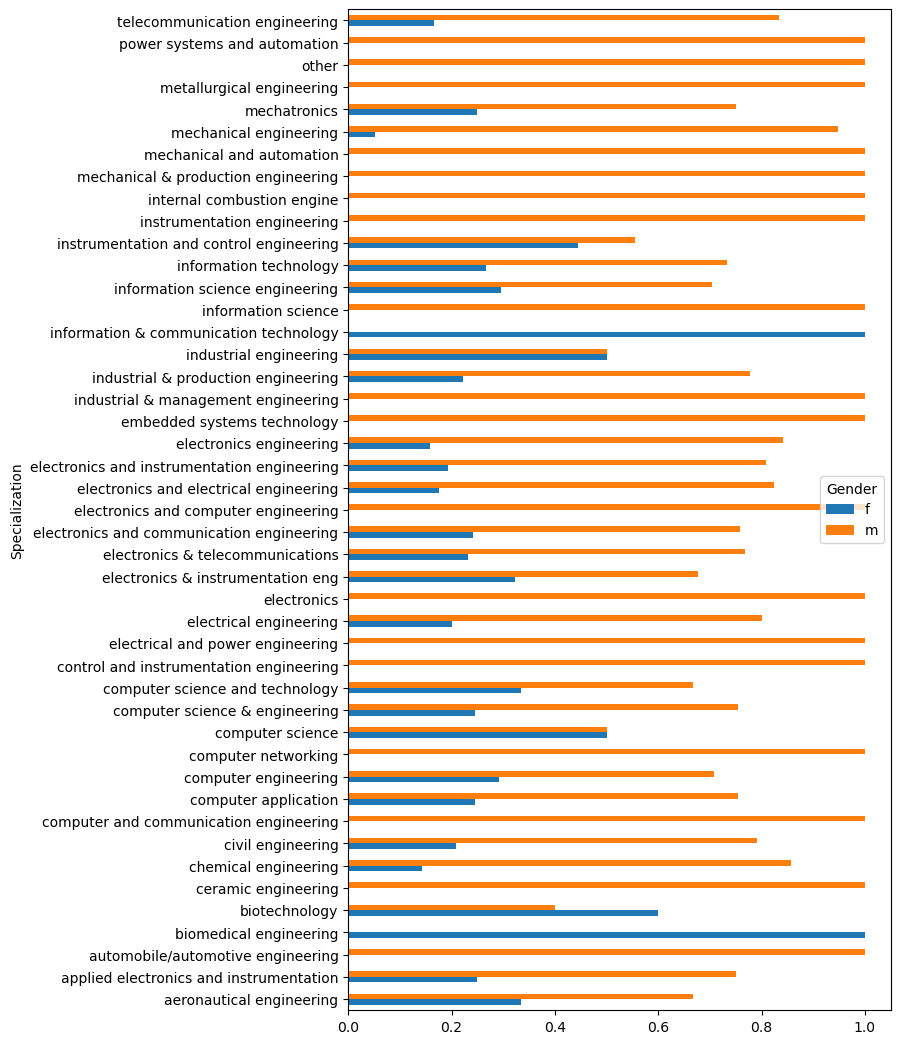

In [35]:
#Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)
tab = pd.crosstab(df2['Specialization'], df2['Gender'], normalize='index')
tab.plot(kind='barh', figsize = (7,13))
plt.show()